In [34]:
##  (-2;9)//	110//	1,25//	4	Скотта	// t-распределение Стьюдента  с числом степеней свободы k=7
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd

from scipy.stats import norm

sigma = 3
a = -2
n_points = 110

1

In [29]:
 massiv = np.random.normal(a, sigma, n_points)
 massiv.sort()
 print(massiv)

[-9.27515155 -8.5668155  -7.71884093 -7.42192007 -7.41887149 -7.33764934
 -7.32578103 -7.03673656 -7.00947308 -6.8983821  -6.11698324 -5.81535281
 -5.61616847 -5.57940203 -5.37479985 -5.30010872 -5.29790853 -4.84213677
 -4.76977399 -4.69230443 -4.65414586 -4.52059899 -4.47260855 -4.43266487
 -4.4008196  -4.39219    -4.27657939 -4.25083571 -4.23538589 -4.20109412
 -3.85801548 -3.79411105 -3.74256322 -3.71022004 -3.6946582  -3.60225443
 -3.47453908 -3.34530312 -3.26307314 -3.24506857 -3.11330222 -3.09386176
 -3.02720158 -2.98027111 -2.95660702 -2.92316107 -2.90971719 -2.88979627
 -2.85265644 -2.83824961 -2.74385856 -2.70953617 -2.60822288 -2.58060189
 -2.49735072 -2.29415945 -2.29351079 -2.25740993 -2.23878748 -2.21025104
 -1.99212104 -1.94783085 -1.92192897 -1.86595423 -1.74184488 -1.69706767
 -1.67098217 -1.65358473 -1.60633337 -1.40080075 -1.36229682 -1.3494509
 -1.2711093  -1.26349302 -1.25905256 -1.21600161 -1.20934008 -1.16609097
 -0.91527397 -0.85515097 -0.70363093 -0.6730912  -0.

Text(0.5, 1.0, 'Гистограмма нормального распределения')

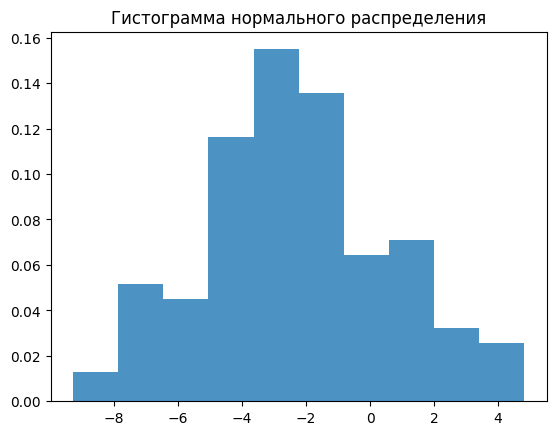

In [30]:
plt.hist(massiv, density=True, histtype='stepfilled', alpha=0.8)
plt.title('Гистограмма нормального распределения')

In [31]:
h = 3.5 * np.std(massiv) / (n_points ** (1 / 3))
k = int((max(massiv) - min(massiv)) / h)
print('h = ', h)
print('k = ', k)

h =  2.142161798506092
k =  6


In [32]:
intervals = []
for i in range(int(k)):
    intervals.append([massiv.min() + h * i, massiv.min() + h * (i + 1)])
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
intervals_gist = []
for i in range(int(k)):
    intervals_gist.append(intervals[i][0])


Количество интервалов:  6
Длина интервала:  2.142161798506092
Интервалы:  [[-9.275151550056734, -7.1329897515506415], [-7.1329897515506415, -4.990827953044549], [-4.990827953044549, -2.8486661545384573], [-2.8486661545384573, -0.7065043560323652], [-0.7065043560323652, 1.435657442473726], [1.435657442473726, 3.577819240979819]]


Количество интервалов:  6
Длина интервала:  2.142161798506092
Интервалы:  [[-9.275151550056734, -7.1329897515506415], [-7.1329897515506415, -4.990827953044549], [-4.990827953044549, -2.8486661545384573], [-2.8486661545384573, -0.7065043560323652], [-0.7065043560323652, 1.435657442473726], [1.435657442473726, 3.577819240979819]]
Абсолютные частоты:  (-9.289, -6.927]     9
(-6.927, -4.579]    12
(-4.579, -2.231]    38
(-2.231, 0.117]     27
(0.117, 2.465]      17
(2.465, 4.813]       7
Name: count, dtype: int64
Сумма абсолютных частот:  110


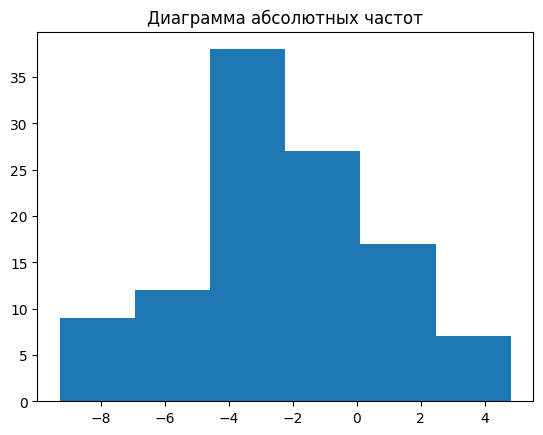

In [37]:
## абсолютные частоты в интервалах группировки
abs_freq = 0.0
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
## вычисление абсолютных частот
abs_freq =  pd.cut(massiv, bins=k).value_counts()
print('Абсолютные частоты: ', abs_freq)
sum_abs_freq = 0
for i in abs_freq:
     sum_abs_freq += i
print('Сумма абсолютных частот: ', sum_abs_freq)
## построение диаграммы абсолютных частот
plt.hist(massiv, bins=k)
plt.title('Диаграмма абсолютных частот')
plt.show()

Количество интервалов:  6
Длина интервала:  2.142161798506092
Интервалы:  [[-9.275151550056734, -7.1329897515506415], [-7.1329897515506415, -4.990827953044549], [-4.990827953044549, -2.8486661545384573], [-2.8486661545384573, -0.7065043560323652], [-0.7065043560323652, 1.435657442473726], [1.435657442473726, 3.577819240979819]]
Относительные частоты:  [0.08181818181818182, 0.10909090909090909, 0.34545454545454546, 0.24545454545454545, 0.15454545454545454, 0.06363636363636363]
Сумма относительных частот:  1.0


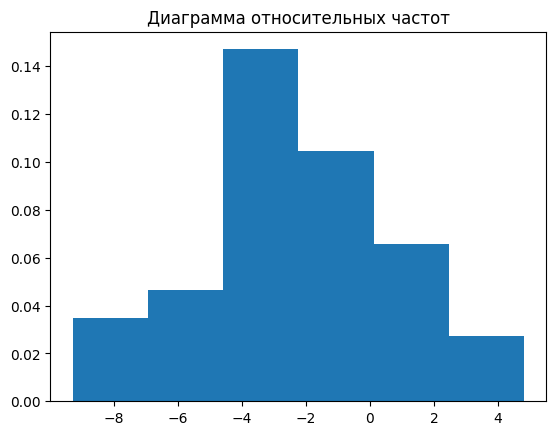

In [38]:
rel_freq = []
print('Количество интервалов: ', k)
print('Длина интервала: ', h)
print('Интервалы: ', intervals)
## вычисление относительных частот
for i in abs_freq:
    rel_freq.append(i/n_points)
print('Относительные частоты: ', rel_freq)
## сумма относительных частот
sum_rel_freq = 0
for i in rel_freq:
    sum_rel_freq += i
print('Сумма относительных частот: ', sum_rel_freq)
## построение диаграммы относительных частот
plt.hist(massiv, bins=k, density=True)
plt.title('Диаграмма относительных частот')
plt.show()

2

Относительные частоты:  [0.08181818181818182, 0.10909090909090909, 0.34545454545454546, 0.24545454545454545, 0.15454545454545454, 0.06363636363636363]


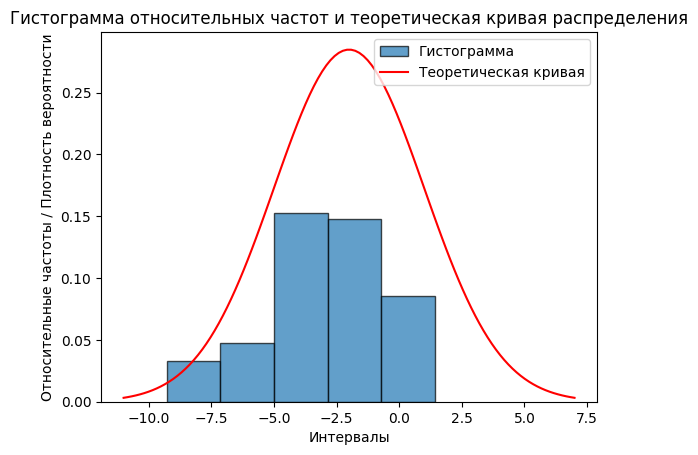

In [46]:
rel_freq = []
## вычисление относительных частот
for i in abs_freq:
    rel_freq.append(i/n_points)
print('Относительные частоты: ', rel_freq)
#plt.bar(intervals_gist, rel_freq, width=h, align='edge')
plt.hist(massiv, bins=intervals_gist, density=True, edgecolor='black', alpha=0.7, label='Гистограмма')
plt.title('Гистограмма относительных частот')
x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
## плотность распределения
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - a) ** 2 / (2 * sigma ** 2))
plt.plot(x, y*h, color='red', label='Теоретическая кривая')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты / Плотность вероятности')
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.legend()
plt.show()
plt.show()

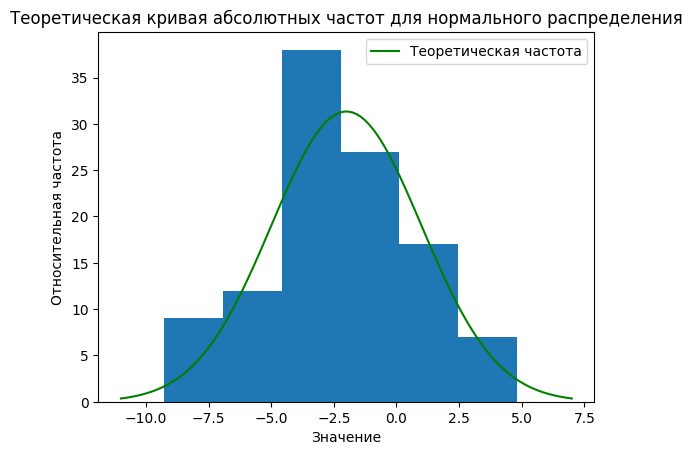

In [48]:
## вычисление абсолютных частот
abs_freq =  pd.cut(massiv, bins=k).value_counts()

#plt.bar(intervals_gist, abs_freq, width=h, align='edge')
plt.hist(massiv, bins=k)
plt.title('Гистограмма абсолютных частот')
## теоретическая частота распределения случайной величины X
x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
y1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - a) ** 2 / (2 * sigma ** 2))
y = (h * n_points * y1)
plt.plot(x, y, color='green', label='Теоретическая частота')
plt.xlabel('Интервалы')
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Теоретическая кривая абсолютных частот для нормального распределения')
plt.legend()
plt.show()
plt.show()


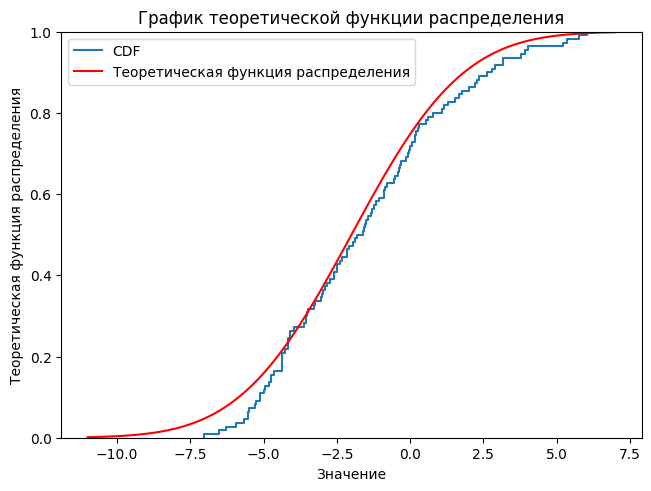

In [14]:
fig = plt.figure(layout="constrained")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.ecdf(massiv, label="CDF")

##график теоретической функции распределения
x = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
y = norm.cdf(x, a, sigma)
plt.plot(x, y, color='red', label='Теоретическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Теоретическая функция распределения')
plt.title('График теоретической функции распределения')
plt.legend()
plt.show()


             X
0.25 -4.093518
0.50 -1.708794
0.75  0.204048


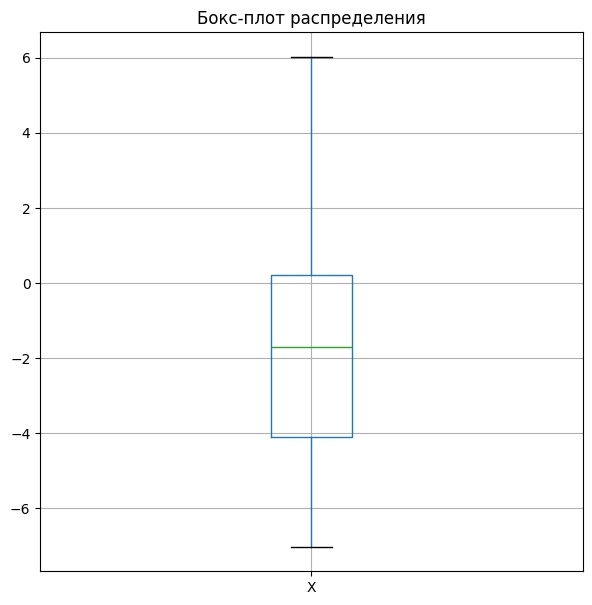

In [15]:
data_frame = DataFrame(data=massiv, columns=['X'])
data_frame.boxplot(figsize=(7, 7))
data_frame.quantile([0.25, 0.5, 0.75])
print(data_frame.quantile([0.25, 0.5, 0.75]))
plt.title('Бокс-плот распределения')
plt.show()

3

In [16]:
# вычисление "вручную"
q = 1.25
# Находим по таблице значение x = 1.25 и по св-ву интегралов суммируем его самим с собой
print("Вероятность, сделанная \"вручную\": ", 0.3944 * 2)
# вычисление с помощью питона
print("Вероятность по lib", sts.norm().cdf(q) - sts.norm().cdf(-q))

# оценка вероятности *
satisfying_values = 0
# найдем все значения выборки, подходящие по усл-ю
for i in massiv:
     if abs(i - a) < q * sigma:
        satisfying_values += 1
# найдем отн. частоту
rel_freq = satisfying_values / n_points
print("Статистическая", rel_freq)
# увеличив выборку в 50 раз, точность оценки вероятности увеличится, потому что гистограмма более совпадает с теоретической кривой(в силу збч)

Вероятность, сделанная "вручную":  0.7888
Вероятность по lib 0.7887004526662893
Статистическая 0.8090909090909091


4

In [52]:
mean = np.mean(massiv)
print(mean)
sum = 0
for i in massiv:
    sum += i
print(sum / len(massiv))

-2.2720071379873636
-2.2720071379873654


In [57]:
variance = np.var(massiv, ddof=0)
print(variance)
sum = 0
for i in massiv:
    sum += (i - mean) ** 2
print(sum / (len(massiv) - 1))

8.599969449916493
8.678868252209302


In [60]:
std_deviation = np.sqrt(variance)
print(std_deviation)
sum = 0
for i in massiv:
    sum += (i - mean) ** 2
print(math.sqrt(sum / (len(massiv) - 1)))


2.932570450972405
2.945991896154723


In [67]:
# Коэффициент асимметрии
skewness = sts.skew(massiv)
print(skewness)
skewness_1 = (np.sum((massiv - mean) ** 3) * len(massiv)) / ((len(massiv) - 1) * (len(massiv) - 2) * std_deviation**3)
print(skewness_1)


0.12266811944359875
0.12608598753546935


In [79]:
# Коэффициент эксцесса
kurtosis = sts.kurtosis(massiv)
print(kurtosis)

kurtosis_1 = ((np.sum((massiv - mean) ** 4) * len(massiv)) / ((len(massiv) - 1) * (len(massiv) - 2) * (len(massiv) - 3) * std_deviation**4) - 3 * ((len(massiv) - 1)**2) / ((len(massiv) - 2) * (len(massiv) - 3)))
print(kurtosis_1)


-0.15907373866271302
-3.057575202277106


In [ ]:
median = np.median(data)